In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the TSV Data File
# df = pd.read_csv('./data/aml_ohsu_2022_clinical_data.tsv', sep='\t') # load the data (tsv file so need to specify sep)
df = pd.read_csv('../data/breast_cancer.csv') # load the data 

In [ ]:
df.to_csv("../data/preprocessed.csv", index=False)

In [10]:
# STEP 4 MODEL TRAINING
import sys
sys.path.append('..')  
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/preprocessed_data.csv')
train = df
train = train.drop(columns='id')
X_train = train[train['diagnosis'].notnull()]

X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['diagnosis']),
    X_train['diagnosis'],
    test_size=1/4.0,
    random_state=0
)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print("split data...")

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

(408, 45)
(136, 45)
(408,)
(136,)
split data...


In [15]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')  
from models.xgboost_scratch import XGBoostFromScratch
from sklearn.metrics import accuracy_score, confusion_matrix

xgb = XGBoostFromScratch()

xgb.fit(X_train, Y_train)

y_pred = xgb.predict(X_test)

print("Accuracy on testing set = ", accuracy_score(Y_test, y_pred))

Accuracy on testing set =  0.9632352941176471


In [2]:
from xgboost_from_chat import XGBoostFromScratch
from sklearn.metrics import accuracy_score, confusion_matrix

model = XGBoostFromScratch(n_estimators=100, max_depth=3, learning_rate=0.1)

In [3]:
for max_depth in [3, 5, 7]:
    for min_child_weight in [1, 3, 5]:
        model = XGBoostFromScratch(n_estimators=100, max_depth=max_depth, learning_rate=0.1, min_child_weight=min_child_weight)
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        print(f"max_depth={max_depth}, min_child_weight={min_child_weight}, Accuracy={accuracy_score(Y_test, y_pred)}")


max_depth=3, min_child_weight=1, Accuracy=0.9338235294117647
max_depth=3, min_child_weight=3, Accuracy=0.9411764705882353
max_depth=3, min_child_weight=5, Accuracy=0.9338235294117647
max_depth=5, min_child_weight=1, Accuracy=0.9558823529411765
max_depth=5, min_child_weight=3, Accuracy=0.9411764705882353
max_depth=5, min_child_weight=5, Accuracy=0.9485294117647058
max_depth=7, min_child_weight=1, Accuracy=0.9558823529411765
max_depth=7, min_child_weight=3, Accuracy=0.9558823529411765
max_depth=7, min_child_weight=5, Accuracy=0.9485294117647058


In [4]:
for learning_rate in [0.01, 0.1, 0.2]:
    for n_estimators in [50, 100, 200]:
        model = XGBoostFromScratch(n_estimators=n_estimators, max_depth=7, learning_rate=learning_rate, min_child_weight=3)
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        print(f"learning_rate={learning_rate}, n_estimators={n_estimators}, Accuracy={accuracy_score(Y_test, y_pred)}")


learning_rate=0.01, n_estimators=50, Accuracy=0.6397058823529411
learning_rate=0.01, n_estimators=100, Accuracy=0.9264705882352942
learning_rate=0.01, n_estimators=200, Accuracy=0.9485294117647058
learning_rate=0.1, n_estimators=50, Accuracy=0.9558823529411765
learning_rate=0.1, n_estimators=100, Accuracy=0.9558823529411765
learning_rate=0.1, n_estimators=200, Accuracy=0.9558823529411765
learning_rate=0.2, n_estimators=50, Accuracy=0.9485294117647058
learning_rate=0.2, n_estimators=100, Accuracy=0.9485294117647058
learning_rate=0.2, n_estimators=200, Accuracy=0.9485294117647058


In [6]:
for lambda_ in [0, 0.1, 1, 10]:
    model = XGBoostFromScratch(n_estimators=200, max_depth=7, learning_rate=0.1, lambda_=lambda_, min_child_weight=3)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(f"lambda_={lambda_}, Accuracy={accuracy_score(Y_test, y_pred)}")


lambda_=0, Accuracy=0.9558823529411765
lambda_=0.1, Accuracy=0.9558823529411765
lambda_=1, Accuracy=0.9558823529411765
lambda_=10, Accuracy=0.9338235294117647


In [7]:
for gamma in [0, 1, 5]:
    model = XGBoostFromScratch(n_estimators=200, max_depth=7, learning_rate=0.1, min_child_weight=3, lambda_=0, gamma=gamma)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(f"gamma={gamma}, Accuracy={accuracy_score(Y_test, y_pred)}")
    # gamma는 직접 로직에 추가해야 합니다. split gain 계산에 반영.

gamma=0, Accuracy=0.9558823529411765
gamma=1, Accuracy=0.9411764705882353
gamma=5, Accuracy=0.9264705882352942


Accuracy on testing set =  0.9558823529411765


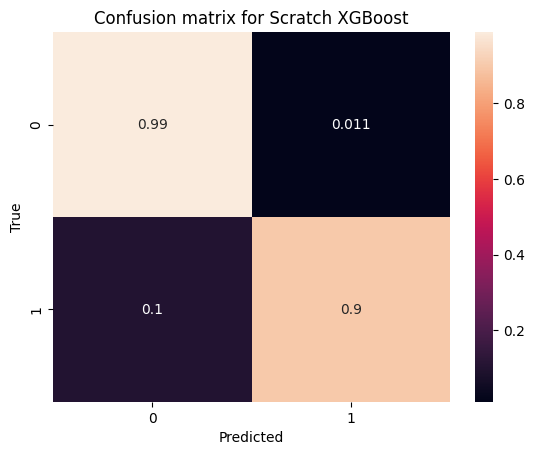

In [17]:
fine_tuned_model =  XGBoostFromScratch(n_estimators=200, max_depth=7, learning_rate=0.1, min_child_weight=3, lambda_=0, gamma=0)
fine_tuned_model.fit(X_train, Y_train)
y_pred = fine_tuned_model.predict(X_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix for Scratch XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()